<a href="https://colab.research.google.com/github/akshithmandala/Projects/blob/main/WRE_2023_GEV_calculation_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install importlib-metadata==4.0.1
!pip install xarray==0.18.1

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 6.8.0
    Uninstalling importlib-metadata-6.8.0:
      Successfully uninstalled importlib-metadata-6.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask 2023.8.1 requires importlib-metadata>=4.13.0, but you have importlib-metadata 4.0.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 807.3/807.3 kB 7.1 MB/s eta 0:00:00
  Attempting uninstall: xarray
    Found existing installation: xarray 2023.7.0
    Uninstalling xarray-2023.7.0:
      Successfully uninstalled xarray-2023.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.15.1 requires xarray>=0.21.0, but you have xarray 0.18.1 which is incompatible.
xarray-e

In [ ]:
# Import necessary Python libraries
import os   # Operating system-related functionality
import xarray as xr  # Library for working with labeled multi-dimensional arrays
import pandas as pd  # Data manipulation library
import numpy as np   # Numerical computing library
import matplotlib.pyplot as plt  # Plotting library
try:
  import skextremes as ske
  import netCDF4 as nc
except:
  # Install skextremes from a GitHub repository using pip
  !pip install git+https://github.com/kikocorreoso/scikit-extremes.git
  # Install lmoments3 from a GitHub repository using pip
  !pip install git+https://github.com/OpenHydrology/lmoments3.git
  !pip install netCDF4
  import skextremes as ske
  import netCDF4 as nc
#import urllib
%matplotlib inline

  Cloning https://github.com/kikocorreoso/scikit-extremes.git to /tmp/pip-req-build-l6hil_a3
  Running command git clone --filter=blob:none --quiet https://github.com/kikocorreoso/scikit-extremes.git /tmp/pip-req-build-l6hil_a3
  Resolved https://github.com/kikocorreoso/scikit-extremes.git to commit 8a17f453d669897a67a3419975ff0921e7786027
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 1.8 MB/s eta 0:00:00
  Created wheel for scikit-extremes: filename=scikit_extremes-0.0.1-py3-none-any.whl size=24621 sha256=82268403c7a040ffd1abfca3cea0541189a45acde4ce91d9bb69251043b2c120
  Stored in directory: /tmp/pip-ephem-wheel-cache-uqrwhzle/wheels/3f/49/5f/959c504b7fc586c455b38d712fd6c0a88c53e0227eacef552e
Successfully built scikit-extremes
  Cloning https://github.com/OpenHydrology/lmoments3.git to /tmp/pip-req-build-qox_quqx
  Running command git clone --filter=blob:none --quiet https://github.com/OpenHydrology/lmoments3.git /tmp/pip-req-buil

In [ ]:
xr.__version__        # Get the version of the xarray library

'2023.7.0'

In [ ]:
# load data from github
!wget https://github.com/divyaupadhyay87/GEV_calculation/raw/main/observed_22_625_80_625.nc

--2023-09-22 06:26:35--  https://github.com/divyaupadhyay87/GEV_calculation/raw/main/observed_22_625_80_625.nc
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/divyaupadhyay87/GEV_calculation/main/observed_22_625_80_625.nc [following]
--2023-09-22 06:26:35--  https://raw.githubusercontent.com/divyaupadhyay87/GEV_calculation/main/observed_22_625_80_625.nc
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117772 (115K) [application/octet-stream]
Saving to: ‘observed_22_625_80_625.nc’

observed_22_625_80_ 100%[===================>] 115.01K  --.-KB/s    in 0.02s   

2023-09-22 06:26:35 (6.92 MB/s) 

In [ ]:
# upload data from your computer
# from google.colab import files
# uploaded = files.upload()

In [ ]:
# Open a netCDF dataset file named 'observed_22_625_80_625.nc' using xarray and store it in the 'ds' variable
ds = xr.open_dataset('observed_22_625_80_625.nc')
ds   # Display the contents of the 'ds' dataset

<xarray.Dataset>
Dimensions:  (time: 6832)
Coordinates:
  * time     (time) datetime64[ns] 1950-06-01 1950-06-02 ... 2005-09-30
    lat      float64 ...
    lon      float64 ...
Data variables:
    pr       (time) float64 ...

In [ ]:
# Access the 'pr' variable (precipitation data) within the 'ds' dataset
ds['pr']

<xarray.DataArray 'pr' (time: 6832)>
array([0., 0., 0., ..., 0., 0., 0.])
Coordinates:
  * time     (time) datetime64[ns] 1950-06-01 1950-06-02 ... 2005-09-30
    lat      float64 22.62
    lon      float64 80.62
Attributes:
    units:    mm/Day

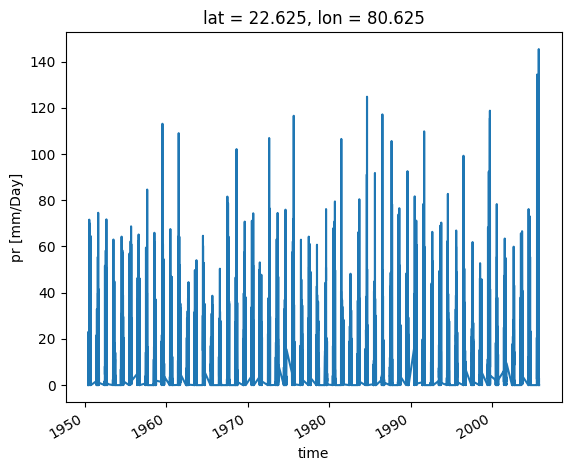

In [ ]:
# Plot the 'pr' variable (precipitation data) from the 'ds' dataset
ds['pr'].plot()

Text(0, 0.5, 'Precipitation level (mm/day)')

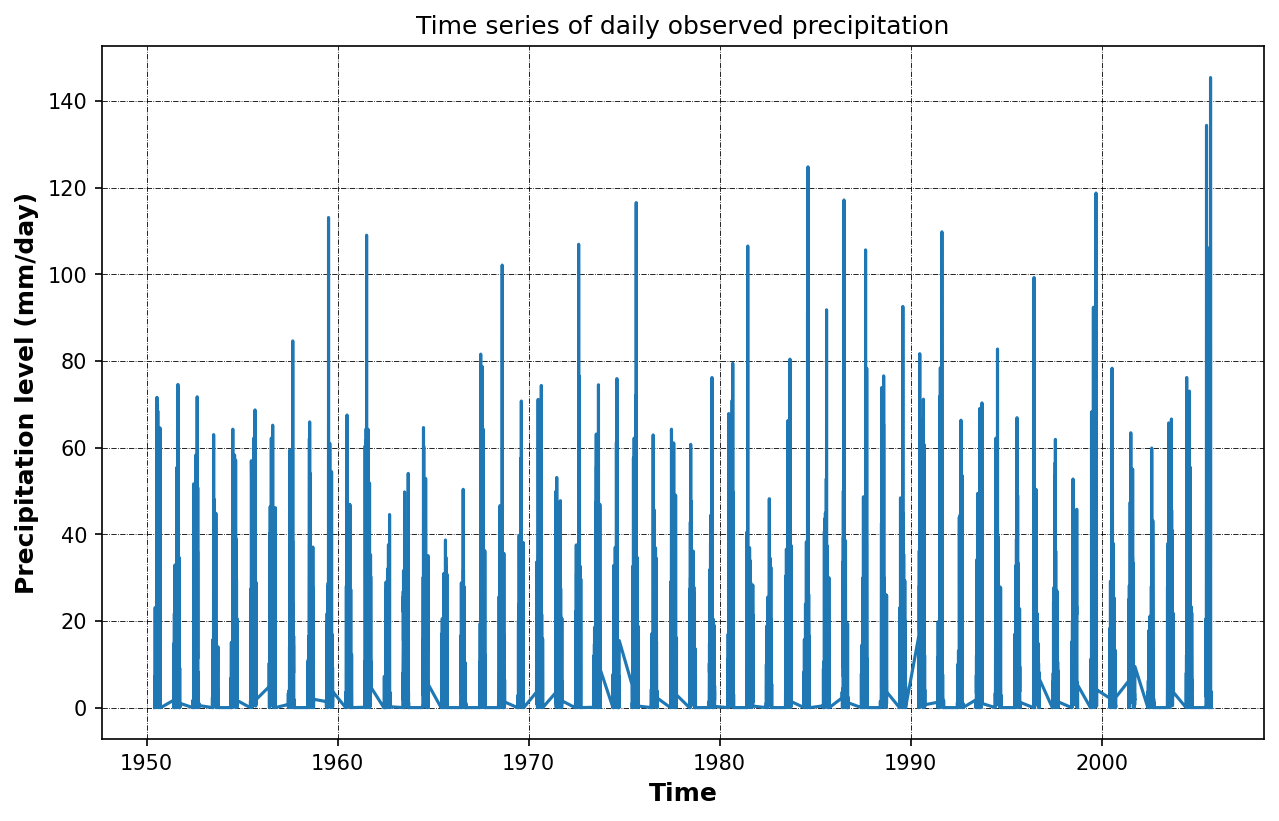

In [ ]:
# Plot daily precipitation data
fig = plt.figure(figsize=(10,6),dpi=150)
plt.grid(which='major',color = 'k', linestyle = '-.', linewidth = 0.4)
plt.plot(ds['time'],ds['pr'])
plt.title('Time series of daily observed precipitation')
plt.xlabel("Time", fontsize = 12,fontweight='bold')
plt.ylabel("Precipitation (mm/day)", fontsize = 12,fontweight='bold')



Text(0, 0.5, 'Precipitation level (mm/day)')

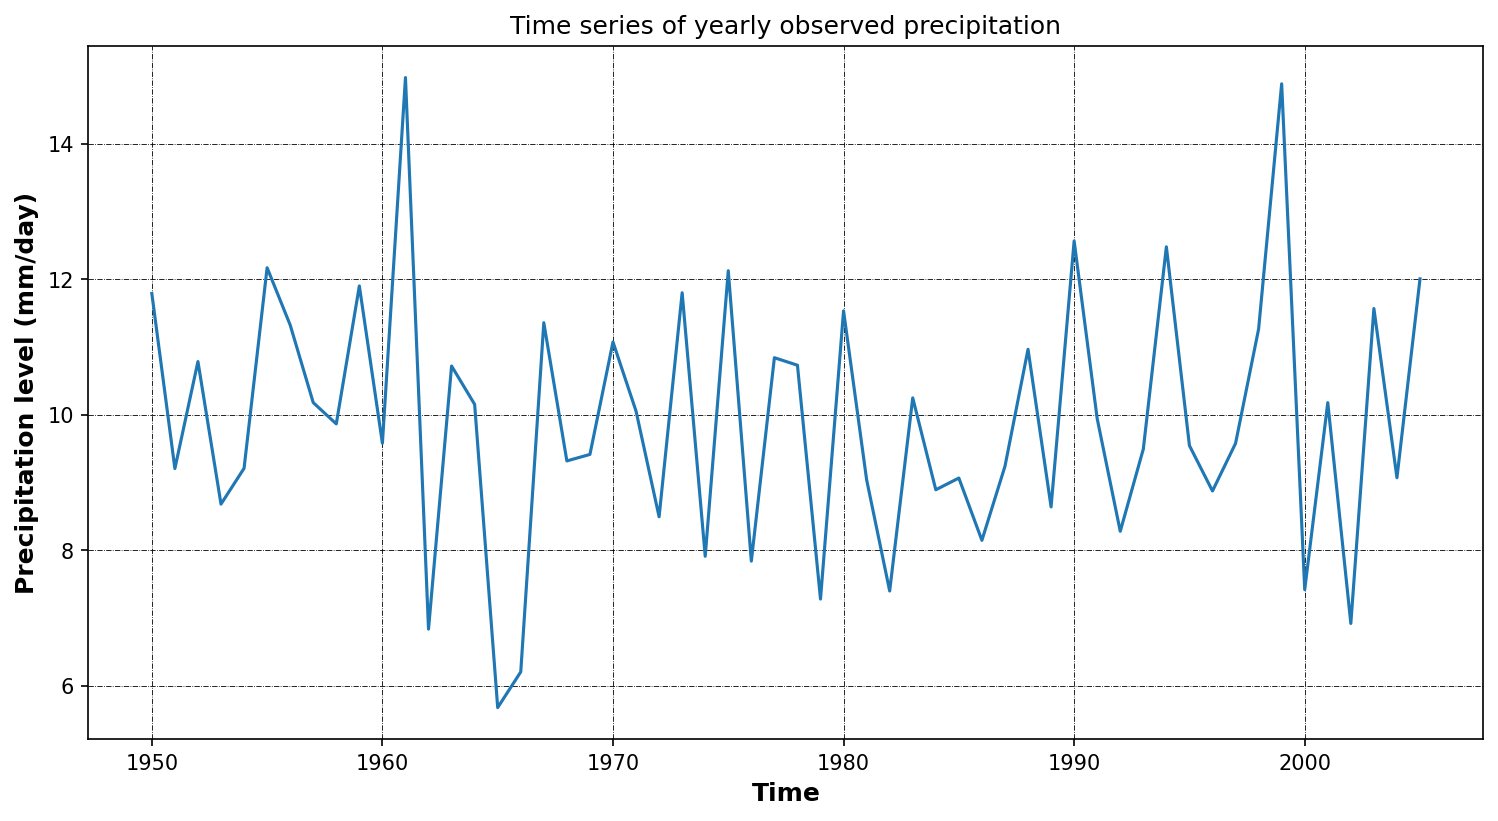

In [ ]:
# plot yearly mean precipitation
# Create an empty list to store yearly precipitation observations
observation_yearly = []
# Loop through years from 1950 to 2005
for i in range(1950,2006):
   # Select data for a specific year using xarray and calculate the mean
    observation_yearly_1 = ds.sel(time=ds.time.dt.year.isin([i])).mean()
    # Extract the 'pr' (precipitation) values from the yearly data
    observation_yearly_1 = observation_yearly_1['pr'].values
    # Append the yearly precipitation data to the observation_yearly list
    observation_yearly.append(observation_yearly_1)
x = np.arange(1950, 2006, dtype=float)
fig = plt.figure(figsize=(12,6),dpi=150)
plt.grid(which='major',color = 'k', linestyle = '-.', linewidth = 0.4)
plt.plot(x ,observation_yearly)
plt.title('Time series of yearly observed mean precipitation')
plt.xlabel("Time", fontsize = 12,fontweight='bold')
plt.ylabel("Precipitation (mm/day)", fontsize = 12,fontweight='bold')

Text(0, 0.5, 'Precipitation level (mm/day)')

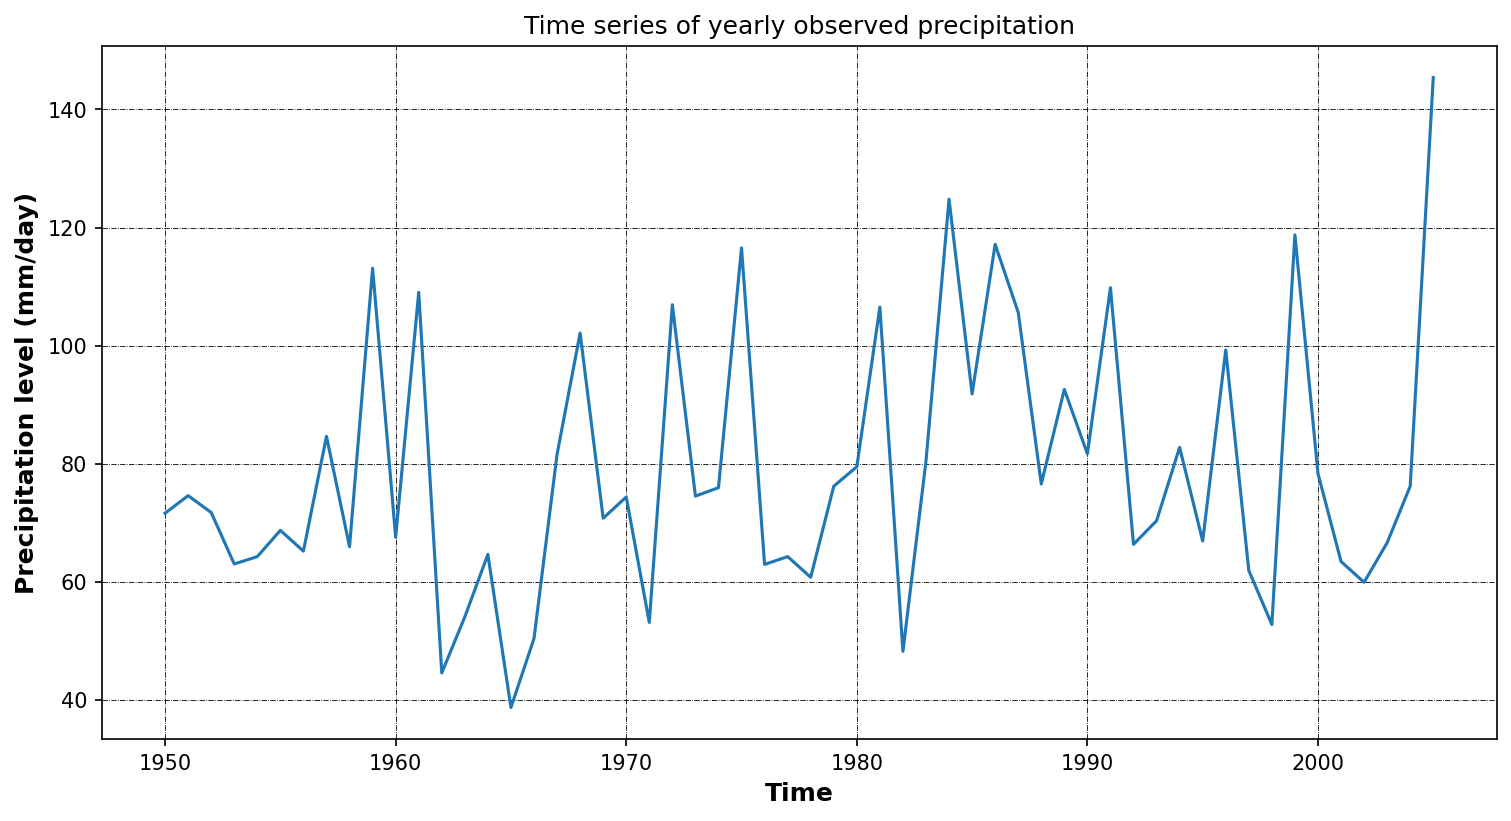

In [ ]:
# plot yearly max precipitation
observation_yearly = []
for i in range(1950,2006):
    observation_yearly_1 = ds.sel(time=ds.time.dt.year.isin([i])).max()
    observation_yearly_1 = observation_yearly_1['pr'].values
    observation_yearly.append(observation_yearly_1)
x = np.arange(1950, 2006, dtype=float)
fig = plt.figure(figsize=(12,6),dpi=150)
plt.grid(which='major',color = 'k', linestyle = '-.', linewidth = 0.4)
plt.plot(x ,observation_yearly)
plt.title('Time series of yearly observed maximum precipitation')
plt.xlabel("Time", fontsize = 12,fontweight='bold')
plt.ylabel("Precipitation (mm/day)", fontsize = 12,fontweight='bold')

**Block-Maxima + Generalised Extreme Value (GEV)**

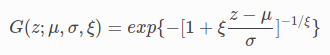

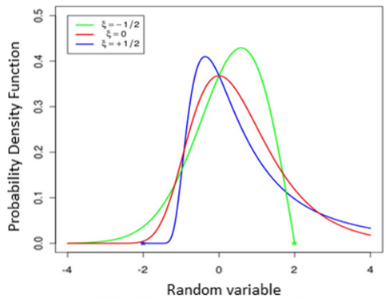

Parameters:
1. Location - μ (−∞<μ<∞),
2. Scale - σ (σ>0) and
3. shape - ξ (∞<ξ<∞)

Depending on shape
1. ξ=0 - Gumbel distribution (type I).
2. ξ>0 - Frêchet (type II) and
3. ξ<0 - the Weibull (type III)

In [ ]:
from scipy.stats import genextreme
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.genextreme.html

In [ ]:
maxima = ds.groupby('time.year').max('time')
max_list = maxima['pr'].values
print(max_list)

[ 71.59999943  74.57500076  71.72500038  62.99999928  64.25
  68.70000029  65.17500019  84.62499905  65.92500114 113.09999847
  67.52500057 109.02499962  44.54999971  54.05000019  64.62500048
  38.67499971  50.37499952  81.57500172 102.125       70.75000095
  74.34999943  53.10000038 106.92500019  74.50000095  75.92500019
 116.54999924  62.92499971  64.25        60.75        76.17499828
  79.47499943 106.52499962  48.20000076  80.42500114 124.80000305
  91.79999924 117.15000057 105.62499809  76.55000114  92.57499886
  81.67499828 109.80000114  66.32499981  70.3249979   82.75000095
  66.9000001   99.25        61.90000057  52.74999905 118.75
  78.32500076  63.42499924  59.89999962  66.59999943  76.17500114
 145.40000153]


In [ ]:
# Fit the generalized extreme value distribution to the data.
shape, loc, scale = genextreme.fit(max_list)
print(shape)
print(loc)
print(scale)

0.019317061549957538
68.7627283598855
17.87254256176997


## Return Period: It is defined as time interval after which a flood of given discharge equalled or exceeded.
Return period (T) = 1/P

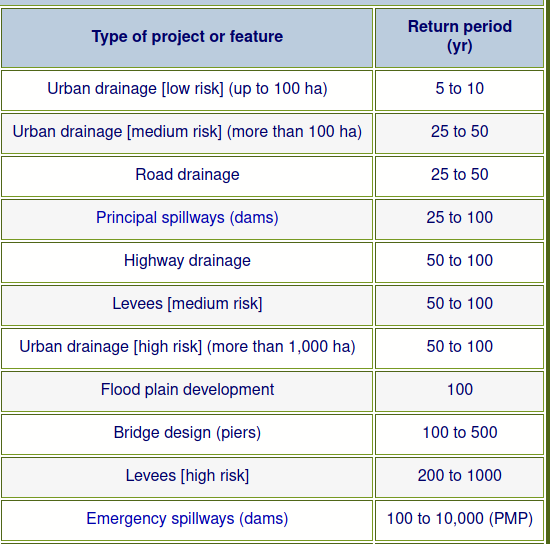

In [ ]:
# Compute the return levels for return period.
return_periods = 1000
return_levels = genextreme.isf(1/return_periods, shape, loc, scale)
print(return_levels)

184.33148687075158


In [ ]:
def return_level_calculation(max_list,return_periods):
    # Fit the generalized extreme value distribution to the data.
    shape, loc, scale = genextreme.fit(max_list)
    # Compute the return levels for several return periods.
    return_levels = genextreme.isf(1/return_periods, shape, loc, scale)
    return [return_levels]

In [ ]:
# rolling sum of two days
abc = ds.rolling(time=2, center=True).sum()
maxima3 = abc.groupby('time.year').max('time') ['pr'].values
return_levels= return_level_calculation(maxima3, 50)
print(return_levels)

[203.78387449830498]


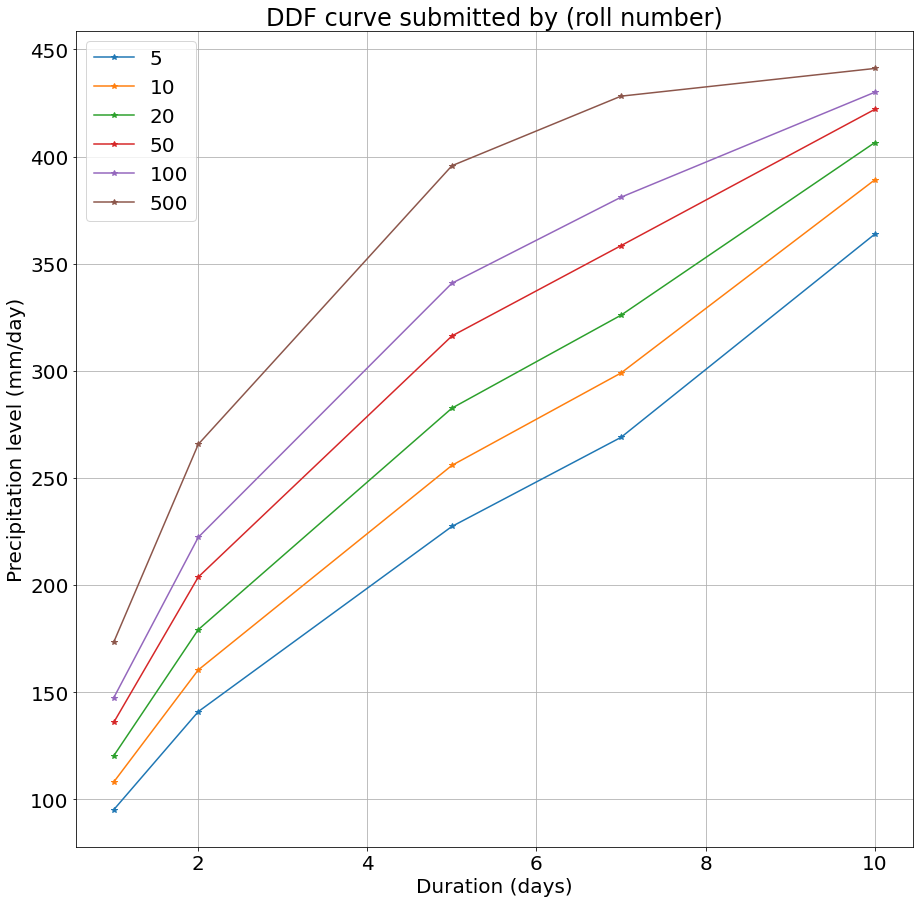

In [ ]:
max_list = []
maxday = [1,2,5,7,10]
return_periods = np.array([ 5, 10, 20, 50, 100,500])
plt.figure(figsize = (15,15))
plt.rcParams.update({'font.size':20})
for j, period1 in enumerate(return_periods):
    data1 =[]
    for k,daymax1 in enumerate(maxday):
        abc = ds.rolling(time=daymax1, center=True).sum()
        maxima3 = abc.groupby('time.year').max('time') ['pr'].values
        return_levels= return_level_calculation(maxima3, period1)
        #print(return_levels)
        data1.append(return_levels)
    plt.plot(maxday ,data1, label = f"{return_periods[j]}", marker = '*' )
    #max_list.append(maxima3)
plt.legend()
plt.grid()
plt.xlabel("Duration (days)")
plt.ylabel("Precipitation level (mm/day)")
plt.title('DDF curve submitted by (roll number)')
plt.savefig('DDF_curve_roll_number.png')

In [ ]:
# scikit-extremes librarym
maxima = ds.groupby('time.year').max('time')
max_list = maxima['pr'].values
model = ske.models.classic.GEV(max_list, fit_method = 'mle', ci = 0.05,
                              ci_method = 'delta')

/usr/local/lib/python3.7/dist-packages/skextremes/models/classic.py:527: RuntimeWarning: divide by zero encountered in log
  sT = -_np.log(1.-self.frec/T)
/usr/local/lib/python3.7/dist-packages/skextremes/models/classic.py:527: RuntimeWarning: invalid value encountered in log
  sT = -_np.log(1.-self.frec/T)
/usr/local/lib/python3.7/dist-packages/skextremes/models/classic.py:546: RuntimeWarning: invalid value encountered in double_scalars
  gradZ = [scale * (c**-2) * (1 - sT[i] ** (-c)) - scale * (c**-1) * (sT[i]**-c) * _np.log(sT[i]),


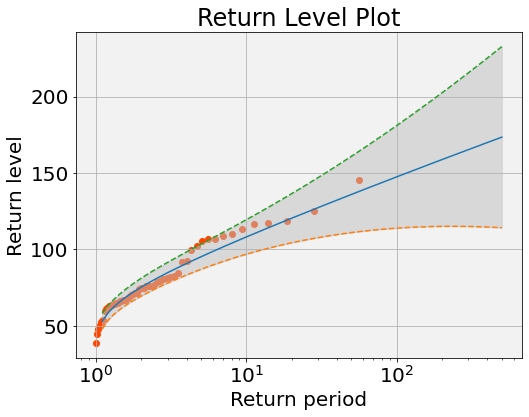

In [ ]:
model.plot_return_values()

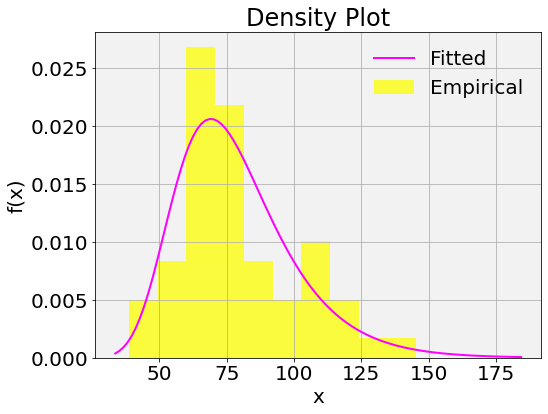

In [ ]:
model.plot_density()

In [ ]:
model.params

OrderedDict([('shape', 0.019315374088739734),
             ('location', 68.76271741591957),
             ('scale', 17.872508826852176)])

In [ ]:
# code for extracting the JJAS -
# observation = ds.sel(time=ds.time.dt.month.isin([6,7,8,9]))